In [1]:
from itertools import product
import numpy as np
import random
import matplotlib.pyplot as plt
from sympy import symbols
from sympy import Matrix

## Regret Learning

In [2]:
# generate matrix
def generate_matrix(N = 3, S = 5):
    result_dict = {i: np.asarray(combo) for i, combo in enumerate(product(range(S+1), repeat=N)) if sum(combo) == S}

    # Convert keys to 0, 1, 2, ...
    result_dict = {k: v for k, v in enumerate(result_dict.values())}

    lenr = len(result_dict)

    # Create a matrix of zeros
    matrix = np.zeros((lenr, lenr))

    # Fill in the matrix
    for i, row in result_dict.items():
        for j, col in result_dict.items():
            if i == j:
                matrix[i, j] = 0
            else:
                check = row - col
                count_negative = np.count_nonzero(check < 0)
                count_positive = np.count_nonzero(check > 0)
                if count_positive > count_negative:
                    matrix[i, j] = 1
                elif count_positive < count_negative:
                    matrix[i, j] = -1
                else:
                    matrix[i, j] = 0

    matrix = matrix.astype(int)
    return matrix, result_dict

The one with plots

[0 0 5]: 4.761904761905041e-08
[0 1 4]: 1.2806022408964336e-07
[0 2 3]: 0.0978926500259199
[0 3 2]: 0.11801717167684822
[0 4 1]: 3.860190956008251e-07
[0 5 0]: 9.109730848861817e-08
[1 0 4]: 1.584829294036548e-07
[1 1 3]: 0.1295340061172903
[1 2 2]: 1.9018690283595247e-06
[1 3 1]: 0.10753966824810916
[1 4 0]: 1.3848292940365365e-07
[2 0 3]: 0.09535655327419927
[2 1 2]: 1.5282019966795054e-06
[2 2 1]: 1.7966817012959873e-06
[2 3 0]: 0.12053574247384408
[3 0 2]: 0.10584889807820891
[3 1 1]: 0.12240608133093366
[3 2 0]: 0.10285826919649757
[4 0 1]: 6.894264302810609e-07
[4 1 0]: 4.0025401491334645e-06
[5 0 0]: 9.109730848861817e-08


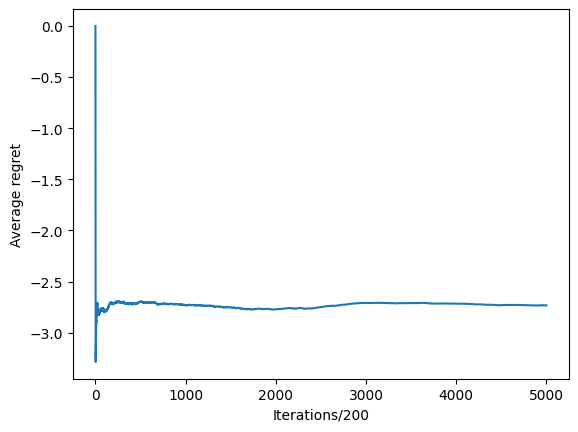

In [3]:
# Function to get current mixed strategy through regret-matching
def get_strategy(regret_sum):
    strategy = np.maximum(0, regret_sum)
    #strategy = regret_sum
    normalizing_sum = np.sum(strategy)
    if normalizing_sum > 0:
        strategy /= normalizing_sum
    else:
        strategy = np.ones(lenr) / lenr
    return strategy

# Function to get random action according to mixed-strategy distribution
def get_action(strategy):
    r = random.random()
    cumulative_probability = 0
    a = 0
    while a < lenr - 1:
        cumulative_probability += strategy[a]
        if r < cumulative_probability:
            break
        a += 1
    return a

# Function to train the model
def train(iterations):
    average_regret = [0]
    regret_sum = np.zeros(lenr)
    strategy_sum = np.zeros(lenr)
    
    for _ in range(iterations):
        # Get regret-matched mixed-strategy actions
        strategy = get_strategy(regret_sum)
        my_action = get_action(strategy)
        other_action = get_action(strategy)

        # Accumulate action regrets
        regret_sum += matrix[:, other_action] - matrix[my_action, other_action]
        strategy_sum += strategy
        if _ != 0 and _ % 200 == 0:
            average_regret.append(np.sum(regret_sum) / _)

    # Get average mixed strategy across all training iterations
    avg_strategy = strategy_sum / np.sum(strategy_sum)
    return avg_strategy, average_regret

data = {}
matrix, result_dict = generate_matrix()
# Main method initializing computation
avg_strategy, average_regret = train(1000000)
for i in range(lenr):
    print(f"{result_dict[i]}: {avg_strategy[i]}")
    data[tuple(result_dict[i])] = avg_strategy[i]

aggregated_probabilities = {}

for strategy, probability in data.items():
    # Sort the strategy to create a tuple that represents the permutation
    permutation = tuple(sorted(strategy))
    
    # If the permutation is already in the dictionary, add the probability
    if permutation in aggregated_probabilities:
        aggregated_probabilities[permutation] += probability
    # If the permutation is not in the dictionary, create a new entry
    else:
        aggregated_probabilities[permutation] = probability

plt.plot(average_regret)
plt.xlabel('Iterations/200')
plt.ylabel('Average regret')
plt.show()

total probability

In [4]:
# Print the aggregated probabilities
for permutation, probability_sum in aggregated_probabilities.items():
    print(f"{permutation}: {probability_sum}")

(0, 0, 5): 2.2981366459628676e-07
(0, 1, 4): 5.503011757912303e-06
(0, 2, 3): 0.6405092847255179
(1, 1, 3): 0.3594797556963331
(1, 2, 2): 5.226752726335017e-06


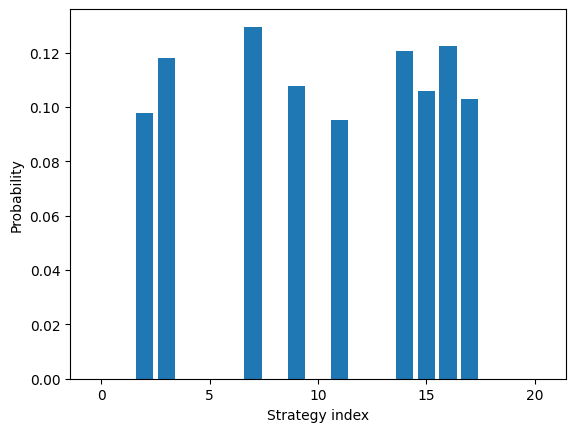

In [5]:
plt.bar(range(len(avg_strategy)), avg_strategy)
plt.xlabel("Strategy index")
plt.ylabel("Probability")
plt.show()

More Plots

In [6]:
matrix, result_dict = generate_matrix()
tt = np.array([0, 0, 1/9, 1/9, 0, 0, 0, 1/9, 0, 1/9, 0, 1/9, 0, 0, 1/9, 1/9, 1/9, 1/9, 0, 0, 0])
store = []

# Function to get current mixed strategy through regret-matching
def get_strategy(regret_sum):
    strategy = np.maximum(0, regret_sum)
    normalizing_sum = np.sum(strategy)
    if normalizing_sum > 0:
        strategy /= normalizing_sum
    else:
        strategy = np.ones(lenr) / lenr
    return strategy

# Function to get random action according to mixed-strategy distribution
def get_action(strategy):
    r = random.random()
    cumulative_probability = 0
    a = 0
    while a < lenr - 1:
        cumulative_probability += strategy[a]
        if r < cumulative_probability:
            break
        a += 1
    return a

# Function to train the model
def train(iterations):
    regret_sum = np.zeros(lenr)
    strategy_sum = np.zeros(lenr)
    
    for _ in range(iterations):
        # Get regret-matched mixed-strategy actions
        strategy = get_strategy(regret_sum)
        my_action = get_action(strategy)
        other_action = get_action(strategy)

        # Accumulate action regrets
        regret_sum += matrix[:, other_action] - matrix[my_action, other_action]
        strategy_sum += strategy

        if _ % 200 == 0:
            store.append((strategy_sum / np.sum(strategy_sum) - tt)**2)

    # Get average mixed strategy across all training iterations
    avg_strategy = strategy_sum / np.sum(strategy_sum)
    return avg_strategy

data = {}
# Main method initializing computation
avg_strategy = train(2000000)
for i in range(lenr):
    data[tuple(result_dict[i])] = avg_strategy[i]

aggregated_probabilities = {}

for strategy, probability in data.items():
    # Sort the strategy to create a tuple that represents the permutation
    permutation = tuple(sorted(strategy))
    
    # If the permutation is already in the dictionary, add the probability
    if permutation in aggregated_probabilities:
        aggregated_probabilities[permutation] += probability
    # If the permutation is not in the dictionary, create a new entry
    else:
        aggregated_probabilities[permutation] = probability

# Print the aggregated probabilities
for permutation, probability_sum in aggregated_probabilities.items():
    print(f"{permutation}: {probability_sum}")

(0, 0, 5): 1.4285714285712845e-07
(0, 1, 4): 4.227000402545471e-06
(0, 2, 3): 0.6641790711500726
(1, 1, 3): 0.3358138107757861
(1, 2, 2): 2.748216595984488e-06


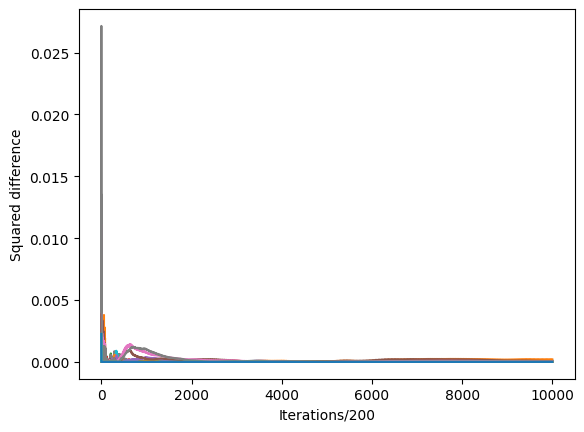

In [7]:
plt.plot(store)
plt.xlabel("Iterations/200")
plt.ylabel("Squared difference")
plt.show()

Theoretical Calculation

In [8]:
# Theoretical Calculation
def get_NE(N, S):
    m = S // N
    r = S % N
    k = N // 2

    # Case 1
    if N % 2 == 0:
        print('case 1')
        S_0_l = np.tile(np.arange(0, 2*m + 1, 2), (k, 1)).T
        S_0_2 = S_0_l[::-1, :]
        S_0 = np.concatenate((S_0_l, S_0_2), axis=1)
        for i in range(r):
            S_0[:, i] += 1
    else:
        n = (m + 1) // 2
        # Case 2.1
        if m % 2 == 0:
            print('case 2.1')
            S_0_0 = np.tile(np.arange(0, 4*n + 1, 2), (k, 1)).T
            S_0_2 = np.concatenate((np.arange(2*n, 4*n + 1, 2), np.arange(0, 2*n - 1, 2)), axis=0).T
            S_0_2 = np.reshape(S_0_2, (4*n-1, 1))
            S_0_3 = np.concatenate((np.arange(4*n, -1, -4), np.arange(4*n - 2, 1, -4)), axis=0).T
            S_0_3 = np.reshape(S_0_3, (4*n-1, 1))
            if k > 1:
                S_0_1 = S_0_0[::-1, :-1]
                S_0 = np.concatenate((S_0_0, S_0_1, S_0_2, S_0_3), axis=1)
            elif k == 1:
                S_0 = np.concatenate((S_0_0, S_0_2, S_0_3), axis=1)
            for i in range(r):
                S_0[:, i] += 1
        # Case 2.2
        else:
            print('case 2.2')
            S_0_1 = np.tile(np.tile(np.arange(4*n - 2, -1, -2), (k, 1)).T, (2, 1))
            S_0_2 = np.arange(0, 4*n).T
            S_0_2 = np.reshape(S_0_2, (4*n, 1))
            S_0_3 = np.concatenate((S_0_2[2*n:], S_0_2[:2*n]))
            S_0_3 = np.reshape(S_0_3, (4*n, 1))
            if k > 1:
                S_0_0 = S_0_1[::-1, :-1]
                S_0 = np.concatenate((S_0_0, S_0_1, S_0_2, S_0_3), axis=1)
            elif k == 1:
                S_0 = np.concatenate(((S_0_1), S_0_2, S_0_3), axis=1)
            for i in range(r-1):
                S_0[:, i] += 1
    
    result = set(tuple(sorted(row)) for row in S_0)
    return S_0, result

In [9]:
# Function to get the probability of each NE
def theory_prob(N, S):
    result = list(get_NE(N, S)[1])
    a = set()
    prob_list = [0] * lenr
    for j in range(len(result)):
        for i in range(lenr):
            if tuple(sorted(result_dict[i])) == result[j]:
                a.add(i)
        lena = len(a)
        for i in a:
            prob_list[i] = 1/lena
        a = set()
    return prob_list

def probgenerator(p3, p6, lenr=lenr):
    prob = np.zeros(lenr)
    prob[7] = prob[9] = prob[16] = p3/3
    prob[2] = prob[3] = prob[11] = prob[14] = prob[15] = prob[17] = p6/6
    return prob

In [10]:
lenr = 21  # Assuming a default value for lenr if not provided
prob = [0] * lenr

# Define symbolic variables
p_sym = symbols('p')
not_p_sym = 1 - p_sym

prob[7] = prob[9] = prob[16] = p_sym / 3
prob[2] = prob[3] = prob[11] = prob[14] = prob[15] = prob[17] = not_p_sym / 6

In [11]:
Matrix(matrix) * Matrix(prob)

Matrix([
[-2*p/3 - 1/3],
[        -p/3],
[           0],
[           0],
[        -p/3],
[-2*p/3 - 1/3],
[        -p/3],
[           0],
[ 2*p/3 - 1/3],
[           0],
[        -p/3],
[           0],
[ 2*p/3 - 1/3],
[ 2*p/3 - 1/3],
[           0],
[           0],
[           0],
[           0],
[        -p/3],
[        -p/3],
[-2*p/3 - 1/3]])

In [12]:
Matrix(matrix) * Matrix(probgenerator(1/2, 1/2))

Matrix([
[  -0.666666666666667],
[  -0.166666666666667],
[                   0],
[2.77555756156289e-17],
[  -0.166666666666667],
[  -0.666666666666667],
[  -0.166666666666667],
[                   0],
[                   0],
[                   0],
[  -0.166666666666667],
[                   0],
[                   0],
[                   0],
[                   0],
[                   0],
[                   0],
[                   0],
[  -0.166666666666667],
[  -0.166666666666667],
[  -0.666666666666667]])

In [13]:
# Test for 2 strategies
def play_round(opponent_weights, my_weights):
    
    # Generate opponent move
    r = random.random()
    cumulative_probability = 0
    a = 0
    while a < lenr - 1:
        cumulative_probability += opponent_weights[a]
        if r < cumulative_probability:
            break
        a += 1
    opponent_move = a

    r = random.random()
    cumulative_probability = 0
    a = 0
    while a < lenr - 1:
        cumulative_probability += my_weights[a]
        if r < cumulative_probability:
            break
        a += 1
    my_move = a
    
    # Determine the winner
    arr = result_dict[my_move] - result_dict[opponent_move]
    count_negative = np.count_nonzero(arr < 0)
    count_positive = np.count_nonzero(arr > 0)
    if count_positive > count_negative:
        return 'win'
    elif count_positive == count_negative:
        return 'tie'
    else:
        return 'lose'

def simulate_games(num_games, opponent_weights, your_weights):
    wins, loss = 0, 0
    for _ in range(num_games):
        result = play_round(opponent_weights, your_weights)
        if result == 'win':
            wins += 1
        elif result == 'lose':
            loss += 1
    return wins, loss


opponent_weights = theory_prob(3, 5)

your_weights = avg_strategy

# Number of games to simulate
num_games = 100000

# Simulate games and get the number of wins
your_wins = simulate_games(num_games, opponent_weights, your_weights)[0]
your_loss = simulate_games(num_games, opponent_weights, your_weights)[1]

print(f"You won {your_wins} out of {num_games} games.")
print(f"You lost {your_loss} out of {num_games} games.")

case 2.2
You won 22091 out of 100000 games.
You lost 22212 out of 100000 games.


## Q learning

Against Random

In [3]:
N = 3  # Number of battlefields
S = 5  # Number of soldiers per battlefield

result_dict = {i: np.asarray(combo) for i, combo in enumerate(product(range(S+1), repeat=N)) if sum(combo) == 5}

# Convert keys to 0, 1, 2, ...
result_dict = {k: v for k, v in enumerate(result_dict.values())}

lenr = len(result_dict)

# Create a matrix of zeros
matrix = np.zeros((lenr, lenr))

# Fill in the matrix
for i, row in result_dict.items():
    for j, col in result_dict.items():
        if i == j:
            matrix[i, j] = 0
        else:
            check = row - col
            count_negative = np.count_nonzero(check < 0)
            count_positive = np.count_nonzero(check > 0)
            if count_positive > count_negative:
                matrix[i, j] = 1
            elif count_positive < count_negative:
                matrix[i, j] = -1
            else:
                matrix[i, j] = 0

matrix = matrix.astype(int)

li = [i for i in range(lenr)]

zyq = [0, 0, 1/9, 1/9, 0, 0, 0, 1/9, 0, 1/9, 0, 1/9, 0, 0, 1/9, 1/9, 1/9, 1/9, 0, 0, 0]

def get_action(q_table, state, exploration_rate):
    if state not in q_table:
        q_table[state] = [0] * lenr
    if random.random() < exploration_rate:
        return random.choice(li)
    else:
        return q_table[state].index(max(q_table[state]))

def update_q_table(q_table, state, action, reward, next_state, learning_rate, discount_factor):
    if state not in q_table:
        q_table[state] = [0] * lenr
    if next_state not in q_table:
        q_table[next_state] = [0] * lenr
    old_value = q_table[state][action]
    next_max = max(q_table[next_state])
    new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_factor * next_max)
    q_table[state][action] = new_value

def train(num_episodes, learning_rate=0.9, discount_factor=0.9, exploration_rate=1, exploration_decay_rate=0.999999):
    q_table = {}
    for episode in range(num_episodes):
        state = (0)  # initial state
        while True:
            player_action = random.randint(0, 20)
            if player_action not in li:
                #print("Invalid move! Try again...")
                continue
            #opponent_action = random.choices(li, weights=zyq, k=1)[0]
            opponent_action = random.randint(0, 20)
            reward = matrix[player_action, opponent_action]
            '''if reward == 0:
                print("It's a tie!")
            elif reward > 0:
                print("You win!")
            else:
                print("You lose!")'''

            next_state = (opponent_action)
            update_q_table(q_table, state, player_action, reward, next_state, learning_rate, discount_factor)
            state = next_state
            if random.random() < exploration_decay_rate:
                exploration_rate *= exploration_decay_rate
            if reward != 0:
                break
    return q_table

# Run training
final_q_table = train(num_episodes=7500000)
print("Final Q-table:")
print(final_q_table)

Final Q-table:
{0: [7.991271056973457, 8.80124570388205, 8.995399742521924, 8.893313364306247, 9.759322711624124, 8.789972497132958, 9.791161161788155, 9.769440583485904, 8.887591710016432, 9.772039124829913, 8.816794539443135, 9.62518509555551, 8.913001936070154, 9.789044729228792, 9.78394867052844, 8.81709735842112, 9.676151195924216, 9.688412155519746, 7.954948051060473, 8.718079153266542, 7.971740278020153], 13: [8.778940151012677, 7.997886087324676, 8.861349037754875, 8.779986766794572, 7.958682259467797, 8.787030608137172, 8.753710851763692, 8.812369883103448, 8.914651862769526, 8.900520515957927, 9.683490637907015, 8.852307700127632, 8.820230835774664, 8.018550559220538, 8.81791670429199, 8.707585515749503, 8.892015501650416, 8.835059034989222, 8.735312982213589, 8.81715220681085, 7.968560545853779], 17: [8.833323435643717, 8.7410467971863, 8.795235712356579, 8.922195766292724, 9.82549793984927, 8.781936817457463, 8.79476163262775, 8.81221130179073, 8.757717378065287, 9.85020185

In [4]:
# Assuming final_q_table is the Q-table obtained after training
print("Final Q-table:")
print(final_q_table)

# Find the best action for each state
for state, q_values in final_q_table.items():
    best_action = q_values.index(max(q_values))
    print(f"In state {state}, the best action is: {best_action}")

Final Q-table:
{0: [7.991271056973457, 8.80124570388205, 8.995399742521924, 8.893313364306247, 9.759322711624124, 8.789972497132958, 9.791161161788155, 9.769440583485904, 8.887591710016432, 9.772039124829913, 8.816794539443135, 9.62518509555551, 8.913001936070154, 9.789044729228792, 9.78394867052844, 8.81709735842112, 9.676151195924216, 9.688412155519746, 7.954948051060473, 8.718079153266542, 7.971740278020153], 13: [8.778940151012677, 7.997886087324676, 8.861349037754875, 8.779986766794572, 7.958682259467797, 8.787030608137172, 8.753710851763692, 8.812369883103448, 8.914651862769526, 8.900520515957927, 9.683490637907015, 8.852307700127632, 8.820230835774664, 8.018550559220538, 8.81791670429199, 8.707585515749503, 8.892015501650416, 8.835059034989222, 8.735312982213589, 8.81715220681085, 7.968560545853779], 17: [8.833323435643717, 8.7410467971863, 8.795235712356579, 8.922195766292724, 9.82549793984927, 8.781936817457463, 8.79476163262775, 8.81221130179073, 8.757717378065287, 9.85020185

Use own strategy as enemy next round

In [6]:
from itertools import product
import random
import numpy as np

N = 3  # Number of battlefields
S = 5  # Number of soldiers per battlefield

result_dict = {i: np.asarray(combo) for i, combo in enumerate(product(range(S + 1), repeat=N)) if sum(combo) == 5}

# Convert keys to 0, 1, 2, ...
result_dict = {k: v for k, v in enumerate(result_dict.values())}

lenr = len(result_dict)

# Create a matrix of zeros
matrix = np.zeros((lenr, lenr))

# Fill in the matrix
for i, row in result_dict.items():
    for j, col in result_dict.items():
        if i == j:
            matrix[i, j] = 0
        else:
            check = row - col
            count_negative = np.count_nonzero(check < 0)
            count_positive = np.count_nonzero(check > 0)
            if count_positive > count_negative:
                matrix[i, j] = 1
            elif count_positive < count_negative:
                matrix[i, j] = -1
            else:
                matrix[i, j] = 0

matrix = matrix.astype(int)

li = [i for i in range(lenr)]

def get_action(q_table, state, exploration_rate):
    if state not in q_table:
        q_table[state] = [0] * lenr
    if random.random() < exploration_rate:
        return random.choice(li)
    else:
        return q_table[state].index(max(q_table[state]))


def update_q_table(q_table, state, action, reward, next_state, learning_rate, discount_factor):
    if state not in q_table:
        q_table[state] = [0] * lenr
    if next_state not in q_table:
        q_table[next_state] = [0] * lenr
    old_value = q_table[state][action]
    next_max = max(q_table[next_state])
    new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_factor * next_max)
    q_table[state][action] = new_value


def train(num_episodes, learning_rate=0.05, discount_factor=0.9, exploration_rate=0.3, exploration_decay_rate=0.99):
    q_table = {}
    for episode in range(num_episodes):
        state = (0)  # initial state

        # Set opponent strategy for the first round
        if episode == 0:
            opponent_q_table = None
        else:
            opponent_q_table = q_table.copy()

        while True:
            player_action = random.randint(0, 20)
            if player_action not in li:
                #print("Invalid move! Try again...")
                continue

            if episode == 0:
                # For the first round, opponent strategy is random
                opponent_action = random.randint(0, 20)
            else:
                # For the remaining rounds, opponent strategy is the one used in the last round
                opponent_action = get_action(opponent_q_table, state, exploration_rate)

            reward = matrix[player_action, opponent_action]
            '''if reward == 0:
                print("It's a tie!")
            elif reward > 0:
                print("You win!")
            else:
                print("You lose!")'''

            next_state = (opponent_action)
            update_q_table(q_table, state, player_action, reward, next_state, learning_rate, discount_factor)
            state = next_state
            if random.random() < exploration_decay_rate:
                exploration_rate *= exploration_decay_rate
            if reward != 0:
                break

    return q_table


# Run training for 5 times
for i in range(5):
    print(f"Training Round {i + 1}")
    final_q_table = train(num_episodes=150000)
    print(f"Final Q-table (Round {i + 1}):")
    print(final_q_table)
    print("-------------------------")

Training Round 1
Final Q-table (Round 1):
{0: [0.8036128893922867, 1.3819130876474823, 1.6160094024642788, 1.491865341374855, 1.371248876911507, 0.9261393937348267, 1.3439944023399955, 1.447124965786554, 1.4318088006962484, 1.6196233658841104, 1.2358333332548554, 1.5263005200908184, 1.507826587110128, 1.432903234395762, 1.4123147178563633, 1.4270757355949084, 1.2895137292250625, 1.4664458297890195, 1.3332116515249361, 1.2818822323663748, 1.0346887430255323], 5: [0, 0, 0, 0, 0.0022500000000000003, 0.00010581589243528754, 0, 0, 0, 0, 0, 0, 0.05, 0, 0, 0, 0, 0.0, 0, 0, -0.05], 20: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 14: [0.6072482520166959, 0.9815638614433477, 1.5355247414516584, 1.5253703814914186, 1.3710441363992605, 0.9184411463610035, 0.9644937089641547, 1.3243994661389533, 1.4830112111697924, 1.3787422251517756, 1.2991084538323474, 1.4619682808979204, 1.4647574728592234, 1.4347837354921809, 1.6528557150667198, 1.5388515032907093, 1.4101895944805793, 1.506

In [7]:
# Assuming final_q_table is the Q-table obtained after training
print("Final Q-table:")
print(final_q_table)

# Find the best action for each state
for state, q_values in final_q_table.items():
    best_action = q_values.index(max(q_values))
    print(f"In state {state}, the best action is: {best_action}")

Final Q-table:
{0: [0.6631791395832067, 1.0536758461414872, 1.388784370538504, 1.3914518151176505, 1.2709222434208047, 0.7765178176136764, 1.3593830973372028, 1.6001407827473095, 1.4838115636941258, 1.2693387590990697, 1.1139787061104107, 1.5323496267237093, 1.5264771460224533, 1.6781284012063216, 1.6371271756183035, 1.5380538017050602, 1.3862057739269116, 1.3948663964008872, 1.3323503462703286, 1.1911013997566475, 0.9187058393548154], 20: [0, 0, 0, 0, 0, 0, 0.004387500000000001, 0, 0.0, 0, 0.00021513863700837896, 0, 0, 0, 0, 0, 0.0, 0, 0, 0.05, 0.00021513863700837896], 5: [0, 0, 0, 0, 0, 0, 0, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.05, 0, 0], 19: [0.6609086597868354, 1.1417140539173465, 0.8991806527246796, 1.4895583628123457, 1.2421026338900163, 0.9998871650598034, 0.8474659924124729, 0.9606617286626462, 1.4111630519787597, 1.42335927767432, 1.1629379610074, 1.476472622666426, 1.19263101711093, 1.4659406219948241, 1.5054926249068594, 1.4753847787100576, 1.4684773623169898, 1.425115530

The one with plots

In [18]:
from itertools import product
import random
import numpy as np

N = 3  # Number of battlefields
S = 5  # Number of soldiers per battlefield

result_dict = {i: np.asarray(combo) for i, combo in enumerate(product(range(S + 1), repeat=N)) if sum(combo) == 5}

# Convert keys to 0, 1, 2, ...
result_dict = {k: v for k, v in enumerate(result_dict.values())}

lenr = len(result_dict)

# Create a matrix of zeros
matrix = np.zeros((lenr, lenr))

# Fill in the matrix
for i, row in result_dict.items():
    for j, col in result_dict.items():
        if i == j:
            matrix[i, j] = 0
        else:
            check = row - col
            count_negative = np.count_nonzero(check < 0)
            count_positive = np.count_nonzero(check > 0)
            if count_positive > count_negative:
                matrix[i, j] = 1
            elif count_positive < count_negative:
                matrix[i, j] = -1
            else:
                matrix[i, j] = 0

matrix = matrix.astype(int)

li = [i for i in range(lenr)]

def get_action(q_table, state, exploration_rate):
    if state not in q_table:
        q_table[state] = [0] * lenr
    if random.random() < exploration_rate:
        return random.choice(li)
    else:
        return q_table[state].index(max(q_table[state]))

def update_q_table(q_table, state, action, reward, next_state, learning_rate, discount_factor):
    if state not in q_table:
        q_table[state] = [0] * lenr
    if next_state not in q_table:
        q_table[next_state] = [0] * lenr
    old_value = q_table[state][action]
    next_max = max(q_table[next_state])
    new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_factor * next_max)
    q_table[state][action] = new_value

def train(num_episodes, learning_rate=0.05, discount_factor=0.9, exploration_rate=0.3, exploration_decay_rate=0.99):
    q_table = {}
    q_values_lists = []  # List to store Q-values for state 2 in each round

    for episode in range(num_episodes):
        state = (0)  # initial state

        # Set opponent strategy for the first round
        if episode == 0:
            opponent_q_table = None
        else:
            opponent_q_table = q_table.copy()

        while True:
            player_action = random.randint(0, 20)
            if player_action not in li:
                continue

            if episode == 0:
                opponent_action = random.randint(0, 20)
            else:
                opponent_action = get_action(opponent_q_table, state, exploration_rate)

            reward = matrix[player_action, opponent_action]

            next_state = (opponent_action)
            update_q_table(q_table, state, player_action, reward, next_state, learning_rate, discount_factor)

            state = next_state
            if random.random() < exploration_decay_rate:
                exploration_rate *= exploration_decay_rate
            if reward != 0:
                # Store Q values for state 2 every 10,000 iterations
                if episode % 10000 == 0 and 2 in q_table:
                        q_values_lists.append(q_table[state].copy())
                break

    return q_table, q_values_lists

# Run training for 5 times
all_q_values_lists = []
for i in range(5):
    print(f"Training Round {i + 1}")
    final_q_table, q_values_list = train(num_episodes=150000)
    all_q_values_lists.append(q_values_list)
    print(f"Final Q-table (Round {i + 1}):")
    print(final_q_table)
    print("-------------------------")

# Now all_q_values_lists contains the Q-values for state 2 in each round

Training Round 1
Final Q-table (Round 1):
{0: [1.0053057481314203, 1.4110860888181278, 1.458551671002299, 1.473500374955029, 1.304904463666583, 0.8707134894560044, 1.2874052903388533, 1.2998292657182489, 1.3433853150017327, 1.4153095992815623, 1.0124425472723244, 1.4134892345820746, 1.4053074772715002, 1.2866862180485934, 1.4525729672375562, 1.3760697489505458, 1.4262406864434456, 1.6089426727132499, 1.5183947806604041, 1.2383370926396533, 0.7692851242505978], 8: [1.1098519363312866, 1.5584449304503527, 1.3457953101655054, 1.4821503745508768, 1.3077909376545684, 0.8779657797146935, 1.2799710283251036, 1.5820029173181913, 1.3697286970187352, 1.1509279122533187, 1.1069686549323026, 1.4845941528779403, 1.4321748770379297, 1.172805026971667, 1.129829916895661, 1.5793779555888283, 1.4117857175386523, 1.549602018730258, 1.2715389290347585, 1.5074355894750076, 0.9681133104155253], 18: [0.78651815279655, 1.0727718601603948, 1.1162191336570697, 1.5272669328792787, 1.3595354575536653, 1.09391009

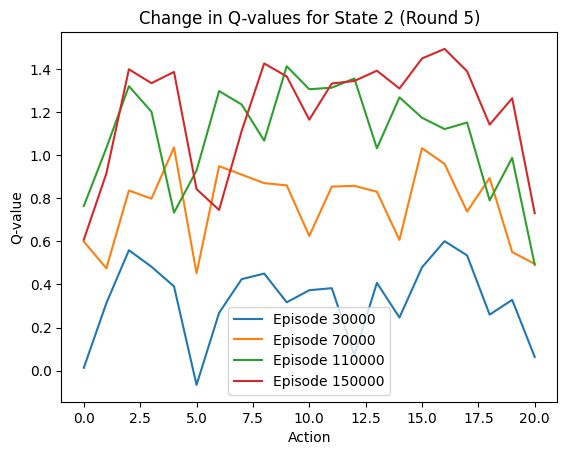

In [19]:
import matplotlib.pyplot as plt

# Assuming all_q_values_lists contains the Q-values for each round
round_index = 4  # Choose the round index (e.g., 0 for the first round)
start_index = 0  # Choose the starting index
end_index = 13   # Choose the ending index (inclusive)

# Extract the relevant Q-values for the specified round and range
q_values_to_plot = all_q_values_lists[round_index][start_index+1:end_index:3]

# Plot each Q-value array
for i, q_values in enumerate(q_values_to_plot):
    plt.plot(q_values, label=f"Episode {(i+1) * 40000 - 10000}")

plt.xlabel("Action")
plt.ylabel("Q-value")
plt.legend()
plt.title(f"Change in Q-values for State 2 (Round {round_index + 1})")
plt.show()

Both Sides Q Learning

In [20]:
# Not that Good
from itertools import product
import random
import numpy as np

N = 3  # Number of battlefields
S = 5  # Number of soldiers per battlefield

result_dict = {i: np.asarray(combo) for i, combo in enumerate(product(range(S + 1), repeat=N)) if sum(combo) == 5}

# Convert keys to 0, 1, 2, ...
result_dict = {k: v for k, v in enumerate(result_dict.values())}

lenr = len(result_dict)

li = [i for i in range(lenr)]

zyq = [0, 0, 1 / 9, 1 / 9, 0, 0, 0, 1 / 9, 0, 1 / 9, 0, 1 / 9, 0, 0, 1 / 9, 1 / 9, 1 / 9, 1 / 9, 0, 0, 0]


def get_action(q_table, state, exploration_rate):
    if state not in q_table:
        q_table[state] = [0] * lenr
    if random.random() < exploration_rate:
        return random.choice(li)
    else:
        return q_table[state].index(max(q_table[state]))


def update_q_table(q_table, state, action, reward, next_state, learning_rate, discount_factor):
    if state not in q_table:
        q_table[state] = [0] * lenr
    if next_state not in q_table:
        q_table[next_state] = [0] * lenr
    old_value = q_table[state][action]
    next_max = max(q_table[next_state])
    new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_factor * next_max)
    q_table[state][action] = new_value


def train(num_episodes, learning_rate=0.1, discount_factor=0.9, exploration_rate=1, exploration_decay_rate=0.999999):
    q_table_player = {}
    q_table_opponent = {}

    for episode in range(num_episodes):
        state_player = (0)  # initial state for player
        state_opponent = (0)  # initial state for opponent

        while True:
            # Player's turn
            player_action = get_action(q_table_player, state_player, exploration_rate)
            opponent_action = get_action(q_table_opponent, state_opponent, exploration_rate)

            reward = matrix[player_action, opponent_action]
            next_state_player = (opponent_action)
            update_q_table(q_table_player, state_player, player_action, reward, next_state_player, learning_rate,
                           discount_factor)
            state_player = next_state_player

            reward_opponent = -reward
            next_state_opponent = (player_action)
            update_q_table(q_table_opponent, state_opponent, player_action, reward_opponent,
                           next_state_opponent, learning_rate, discount_factor)
            state_opponent = next_state_opponent

            if random.random() < exploration_decay_rate:
                exploration_rate *= exploration_decay_rate
            if reward != 0 or reward_opponent != 0:
                break

    return q_table_player, q_table_opponent


# Run training
final_q_table_player, final_q_table_opponent = train(num_episodes=500000)
print("Final Q-table (Player):")
print(final_q_table_player)
print("Final Q-table (Opponent):")
print(final_q_table_opponent)

Final Q-table (Player):
{0: [6.279642634268055, 6.260156589167212, 6.411971729526165, 6.413108211716642, 6.387654017326315, 6.1089604096447, 6.857285485923728, 6.781965999631703, 6.979703930758332, 7.081345597106105, 6.3019194964137455, 6.7706812191864785, 6.90073024290423, 6.773516470843309, 6.487068586164039, 6.905491444459471, 6.862239662653132, 6.3477002093038575, 6.776273255588241, 6.445242468333068, 6.26520517607307], 17: [5.891458418485017, 6.231539587054967, 6.315256107753317, 6.225157017956157, 6.231277995678012, 6.206016385098711, 6.627501430529857, 6.821118681436414, 6.8811194487146725, 6.765654565089155, 6.2857487910484195, 6.408819205653931, 6.736890496636879, 6.674405791217127, 6.266637096828798, 6.719773121123454, 6.5331950816622175, 6.292439804787488, 6.528161141328026, 6.339214709795282, 6.002765182464707], 9: [6.090809672470904, 6.48853834333922, 6.28868830316128, 6.363628848539084, 6.385851237429461, 5.976134149752288, 6.501741595638843, 6.602951863384529, 6.75917715

Test for 2 strategies

In [8]:
# Final Q-table

# Fixed strategy (always choose paper)
fixed_strategy = [0, 0, 1/9, 1/9, 0, 0, 0, 1/9, 0, 1/9, 0, 1/9, 0, 0, 1/9, 1/9, 1/9, 1/9, 0, 0, 0]

# Function to choose an action based on a strategy
def choose_action(strategy):
    return np.random.choice(li, p=strategy)

# Function to simulate an episode and calculate total rewards
def simulate_episode(q_list, strategy, num_episodes=100000):
    win = 0
    lose = 0
    tie = 0

    for _ in range(num_episodes):
        # Simulate an episode using Q-list
        #state = (random.choices(li, weights=zyq, k=1)[0], np.random.randint(21))
        state = (random.choices(li, weights=zyq, k=1)[0])
        if state not in q_list:
            action_q_list = random.choice(li)
        else:
            action_q_list = np.argmax(q_list[state])

        # Simulate an episode using fixed strategy
        action_fixed_strategy = choose_action(strategy)
        reward = matrix[action_q_list, action_fixed_strategy]
        if reward == 0:
            tie += 1
        elif reward > 0:
            win += 1
        lose = num_episodes - win - tie

    return win, tie, lose

# Simulate episodes and calculate total rewards
win, tie, lose = simulate_episode(final_q_table, fixed_strategy)
print(f"Win: {win}, Tie: {tie}, Lose: {lose}")

Win: 22259, Tie: 54390, Lose: 23351
